## Grid Search Sk-learn 

In this notebook I will be demonstrating Grid search which is one of the most effective and popular model selection tool. I am using SVM here but the choice of the classifier is irrelevent for this notebook. I chose SVM since it has quite a few hyperparameters that can be efficienty searched using the Grid search method. The data used here is the Social Network Ads dataset which can be downloaded from Kaggle. This link is given below.

https://www.kaggle.com/rakeshrau/social-network-ads

### Basic Imports 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### The Data

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
data['Purchased'].nunique()

2

In [5]:
data.shape

(400, 5)

We can see that the dataset has 4 features which can be used to find out wheather a customer has bought a product from the given website or not. We can also see that this is a binary classification task since we only have 2 unique target labels. 

### Encoding Categorical Variable 

In [6]:
Sex = pd.get_dummies(data['Gender'],drop_first=True) # drop_first=True is to avoid dummy variable trap 

In [8]:
data.drop('Gender',inplace=True,axis=1)

In [10]:
data = pd.concat([data,Sex],axis=1)

In [11]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19.0,19000.0,0,1
1,15810944,35.0,20000.0,0,1
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,0,1


### Checking for missing values 

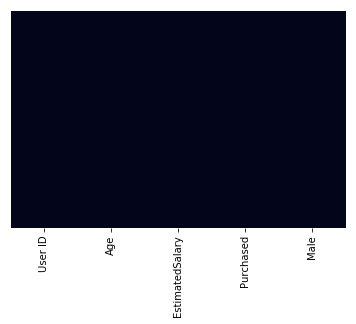

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

As we can see, there are no missing values in the dataset 

### Seperating dependent and independent variables 

In [16]:
X = data.drop(['Purchased','User ID'],axis=1) # we don't need to use User ID as a feature 

In [17]:
X.shape

(400, 3)

In [18]:
y = data['Purchased']

In [19]:
y.shape

(400,)

### Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

###  Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
sc = MinMaxScaler(feature_range=(0,1))

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Kernel SVM to the Training set

In [25]:
from sklearn.svm import SVC

In [26]:
model = SVC() # all default now 

In [27]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predicting the Test set results

In [28]:
y_pred = model.predict(X_test)

### Evaluating the model 

In [29]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [30]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.87


In [32]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.87      0.94      0.90        65
          1       0.87      0.74      0.80        35

avg / total       0.87      0.87      0.87       100



In [33]:
cm = confusion_matrix(y_test,y_pred)

In [34]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[61  4]
 [ 9 26]]


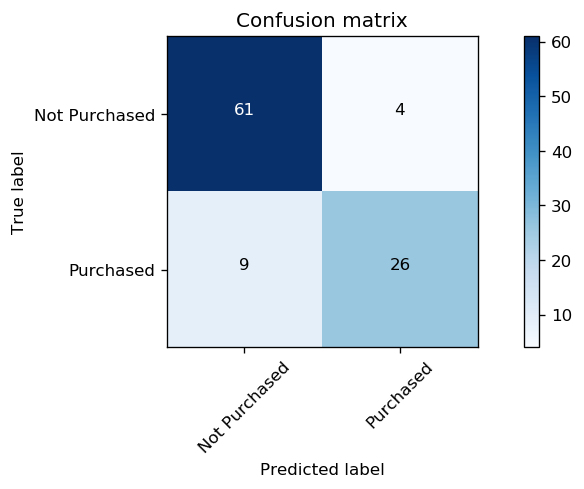

In [37]:
fig = plt.figure(figsize=(8,4),dpi=120)
plot_confusion_matrix(cm,classes=['Not Purchased','Purchased'])

###  Applying Grid Search to find the best model and the best hyper-parameters

In [38]:
from sklearn.model_selection import GridSearchCV

In [40]:
hyper_parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [41]:
grid_search = GridSearchCV(estimator = model,
                           param_grid = hyper_parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [42]:
grid_search = grid_search.fit(X_train, y_train)

In [44]:
print('Best Accuracy:',grid_search.best_score_)

Best Accuracy: 0.9133333333333333


In [46]:
print('Best Model:')
print('\n')
print(grid_search.best_estimator_)

Best Model:


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [48]:
print('Best Hyper-parameters:')
print('\n')
print(grid_search.best_params_)

Best Hyper-parameters:


{'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}


We can already see the effectiveness of Grid Search. Notice that the best model from Grid search is lot different from the default model we had used earlier. We can keep on adding different combinations of hyper-parameters to the Grid and try to impove the model further. Since we now have the best hyper-parameter combination, we use that to build a new and improved model. 